<a href="https://colab.research.google.com/github/OlgaHumphreys/goit-algo-fp/blob/main/goit_algo_fp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання 1. Структури даних. Сортування. Робота з однозв'язним списком

Для реалізації однозв'язного списку (приклад реалізації можна взяти з конспекту) необхідно:
написати функцію, яка реалізує реверсування однозв'язного списку, змінюючи посилання між вузлами;
розробити алгоритм сортування для однозв'язного списку, наприклад, сортування вставками або злиттям;
написати функцію, що об'єднує два відсортовані однозв'язні списки в один відсортований список.

Реалізація однозв'язного списку

In [1]:
class Node:
    def __init__(self, data):
        self.data = data
        self.next = None

class LinkedList:
    def __init__(self):
        self.head = None

    def append(self, data):
        new_node = Node(data)
        if not self.head:
            self.head = new_node
            return
        last = self.head
        while last.next:
            last = last.next
        last.next = new_node

    def print_list(self):
        current = self.head
        while current:
            print(current.data, end=" -> ")
            current = current.next
        print("None")


Функція реверсування однозв'язного списку

In [2]:
def reverse_linked_list(ll):
    prev = None
    current = ll.head
    while current:
        next_node = current.next
        current.next = prev
        prev = current
        current = next_node
    ll.head = prev


Алгоритм сортування для однозв'язного списку (сортування злиттям)

In [3]:
def merge_sort_linked_list(ll):
    if not ll.head or not ll.head.next:
        return ll

    mid = get_middle(ll.head)
    left_half = LinkedList()
    right_half = LinkedList()
    left_half.head = ll.head
    right_half.head = mid.next
    mid.next = None

    left_sorted = merge_sort_linked_list(left_half)
    right_sorted = merge_sort_linked_list(right_half)

    sorted_list = merge_two_sorted_lists(left_sorted.head, right_sorted.head)
    sorted_ll = LinkedList()
    sorted_ll.head = sorted_list
    return sorted_ll

def get_middle(head):
    if not head:
        return head

    slow = head
    fast = head.next

    while fast and fast.next:
        slow = slow.next
        fast = fast.next.next

    return slow

def merge_two_sorted_lists(l1, l2):
    if not l1:
        return l2
    if not l2:
        return l1

    if l1.data < l2.data:
        result = l1
        result.next = merge_two_sorted_lists(l1.next, l2)
    else:
        result = l2
        result.next = merge_two_sorted_lists(l1, l2.next)
    return result


Функція об'єднання двох відсортованих однозв'язних списків в один відсортований список

In [4]:
def merge_sorted_linked_lists(l1, l2):
    dummy = Node(0)
    tail = dummy

    while l1 and l2:
        if l1.data < l2.data:
            tail.next = l1
            l1 = l1.next
        else:
            tail.next = l2
            l2 = l2.next
        tail = tail.next

    if l1:
        tail.next = l1
    if l2:
        tail.next = l2

    merged_list = LinkedList()
    merged_list.head = dummy.next
    return merged_list


Тепер протестуємо наші функції.

In [5]:

ll = LinkedList()
ll.append(3)
ll.append(1)
ll.append(4)
ll.append(2)
ll.append(5)

print("Original list:")
ll.print_list()

reverse_linked_list(ll)
print("Reversed list:")
ll.print_list()

ll = LinkedList()
ll.append(3)
ll.append(1)
ll.append(4)
ll.append(2)
ll.append(5)

sorted_ll = merge_sort_linked_list(ll)
print("Sorted list:")
sorted_ll.print_list()

ll1 = LinkedList()
ll1.append(1)
ll1.append(3)
ll1.append(5)

ll2 = LinkedList()
ll2.append(2)
ll2.append(4)
ll2.append(6)

merged_ll = merge_sorted_linked_lists(ll1.head, ll2.head)
print("Merged sorted list:")
merged_ll.print_list()


Original list:
3 -> 1 -> 4 -> 2 -> 5 -> None
Reversed list:
5 -> 2 -> 4 -> 1 -> 3 -> None
Sorted list:
1 -> 2 -> 3 -> 4 -> 5 -> None
Merged sorted list:
1 -> 2 -> 3 -> 4 -> 5 -> 6 -> None


Завдання 2. Рекурсія. Створення фрактала “дерево Піфагора” за допомогою рекурсії

Необхідно написати програму на Python, яка використовує рекурсію для створення фрактала “дерево Піфагора”. Програма має візуалізувати фрактал “дерево Піфагора”, і користувач повинен мати можливість вказати рівень рекурсії.

In [ ]:
import turtle
import math

def draw_pythagoras_tree(t, branch_length, level):
    if level == 0:
        return

    t.forward(branch_length)

    x, y = t.position()
    angle = t.heading()

    t.left(45)
    draw_pythagoras_tree(t, branch_length * math.sqrt(2) / 2, level - 1)

    t.setposition(x, y)
    t.setheading(angle)

    t.right(45)
    draw_pythagoras_tree(t, branch_length * math.sqrt(2) / 2, level - 1)

    t.setposition(x, y)
    t.setheading(angle)

def main():
    screen = turtle.Screen()
    screen.bgcolor("white")
    t = turtle.Turtle()
    t.speed(0)

    branch_length = 100
    level = int(input("Enter recursion level: "))

    t.penup()
    t.setposition(0, -screen.window_height() // 2 + 20)
    t.pendown()
    t.left(90)

    draw_pythagoras_tree(t, branch_length, level)

    t.hideturtle()
    screen.mainloop()

if __name__ == "__main__":
    main()


Завдання 3. Дерева, алгоритм Дейкстри

Розробіть алгоритм Дейкстри для знаходження найкоротших шляхів у зваженому графі, використовуючи бінарну купу. Завдання включає створення графа, використання піраміди для оптимізації вибору вершин та обчислення найкоротших шляхів від початкової вершини до всіх інших.

In [3]:
import heapq

class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}
        self.paths = {}

    def add_node(self, value):
        self.nodes.add(value)
        self.edges[value] = []

    def add_edge(self, from_node, to_node, path):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.paths[(from_node, to_node)] = path
        self.paths[(to_node, from_node)] = path


In [2]:
def dijkstra(graph, start):
    paths = {node: float('inf') for node in graph.nodes}
    paths[start] = 0

    priority_queue = [(0, start)]
    heapq.heapify(priority_queue)

    while priority_queue:
        current_path, current_node = heapq.heappop(priority_queue)

        if current_path > paths[current_node]:
            continue

        for neighbor in graph.edges[current_node]:
            path = current_path + graph.paths[(current_node, neighbor)]

            if path < paths[neighbor]:
                paths[neighbor] = path
                heapq.heappush(priority_queue, (path, neighbor))

    return paths


In [ ]:
graph = Graph()
nodes = ['A', 'B', 'C', 'D', 'E', 'F']
for node in nodes:
    graph.add_node(node)

edges = [
    ('A', 'B', 4),
    ('A', 'C', 2),
    ('B', 'C', 1),
    ('B', 'D', 5),
    ('C', 'D', 8),
    ('C', 'E', 10),
    ('D', 'E', 2),
    ('D', 'F', 6),
    ('E', 'F', 3),
]

for edge in edges:
    graph.add_edge(*edge)

start_node = 'A'
paths = dijkstra(graph, start_node)

for node in nodes:
    print(f"Path from {start_node} до {node} = {paths[node]}")


Цей код дозволяє ефективно знайти найкоротші шляхи в зваженому графі за допомогою алгоритму Дейкстри та бінарної купи для оптимізації вибору вершин.








Завдання 4. Візуалізація піраміди

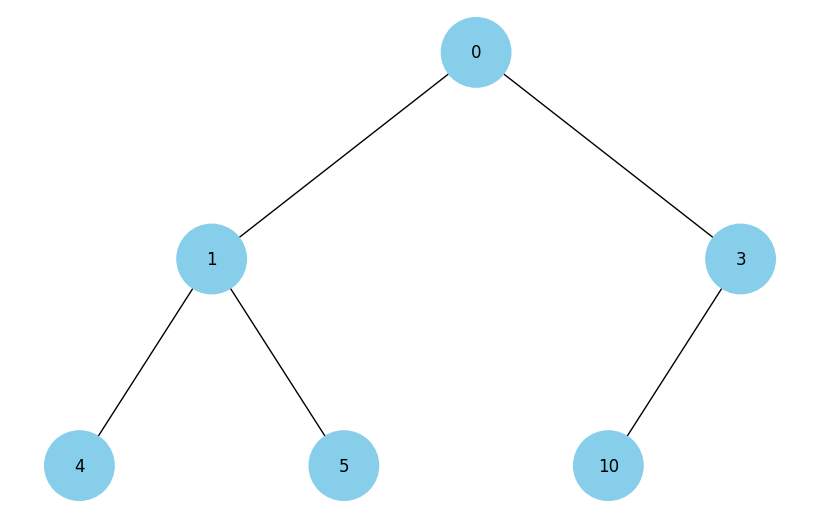

In [4]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt
import heapq

class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color
        self.id = str(uuid.uuid4())

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}

    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()

def heap_to_tree(heap):
    if not heap:
        return None

    nodes = [Node(key) for key in heap]
    n = len(nodes)

    for i in range(n // 2):
        if 2 * i + 1 < n:
            nodes[i].left = nodes[2 * i + 1]
        if 2 * i + 2 < n:
            nodes[i].right = nodes[2 * i + 2]

    return nodes[0]

heap = [0, 1, 3, 4, 5, 10]

root = heap_to_tree(heap)

draw_tree(root)


Завдання 5. Візуалізація обходу бінарного дерева

Використовуючи код із завдання 4 для побудови бінарного дерева, необхідно створити програму на Python, яка візуалізує обходи дерева: у глибину та в ширину.

Вона повинна відображати кожен крок у вузлах з різними кольорами, використовуючи 16-систему RGB (приклад #1296F0). Кольори вузлів мають змінюватися від темних до світлих відтінків, залежно від послідовності обходу. Кожен вузол при його відвідуванні має отримувати унікальний колір, який візуально відображає порядок обходу.

In [ ]:
import uuid
import networkx as nx
import matplotlib.pyplot as plt
import colorsys

class Node:
    def __init__(self, key):
        self.left = None
        self.right = None
        self.val = key
        self.color = "#000000"
        self.id = str(uuid.uuid4())

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}

    plt.figure(figsize=(10, 7))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()

def heap_to_tree(heap):
    if not heap:
        return None

    nodes = [Node(key) for key in heap]
    n = len(nodes)

    for i in range(n // 2):
        if 2 * i + 1 < n:
            nodes[i].left = nodes[2 * i + 1]
        if 2 * i + 2 < n:
            nodes[i].right = nodes[2 * i + 2]

    return nodes[0]

def generate_color(index, total):
    hue = index / total
    lightness = 0.5 + 0.5 * (index / total)
    color = colorsys.hls_to_rgb(hue, lightness, 1)
    return '#%02x%02x%02x' % (int(color[0] * 255), int(color[1] * 255), int(color[2] * 255))


In [ ]:
def depth_first_search(node, order, colors):
    if node is not None:
        node.color = colors[order.index(node.val)]
        draw_tree(root)
        depth_first_search(node.left, order, colors)
        depth_first_search(node.right, order, colors)

def breadth_first_search(node, order, colors):
    queue = [node]
    while queue:
        current = queue.pop(0)
        if current is not None:
            current.color = colors[order.index(current.val)]
            draw_tree(root)
            queue.append(current.left)
            queue.append(current.right)


In [ ]:
heap = [0, 1, 3, 4, 5, 10]

root = heap_to_tree(heap)

total_nodes = len(heap)
colors = [generate_color(i, total_nodes) for i in range(total_nodes)]
order = heap

print("Step in depth")
depth_first_search(root, order, colors)

root = heap_to_tree(heap)

print("Step in width")
breadth_first_search(root, order, colors)


Завдання 6. Жадібні алгоритми та динамічне програмування

Необхідно написати програму на Python, яка використовує два підходи — жадібний алгоритм та алгоритм динамічного програмування для розв’язання задачі вибору їжі з найбільшою сумарною калорійністю в межах обмеженого бюджету.

Кожен вид їжі має вказану вартість і калорійність. Дані про їжу представлені у вигляді словника, де ключ — назва страви, а значення — це словник з вартістю та калорійністю.

Greedy Algorythm

In [ ]:
def greedy_algorithm(items, budget):
    sorted_items = sorted(items.items(), key=lambda x: x[1]["calories"] / x[1]["cost"], reverse=True)
    total_calories = 0
    total_cost = 0
    chosen_items = []

    for item, info in sorted_items:
        if total_cost + info["cost"] <= budget:
            chosen_items.append(item)
            total_cost += info["cost"]
            total_calories += info["calories"]

    return chosen_items, total_cost, total_calories


Dynamic Programming Algorythm

In [ ]:
def dynamic_programming(items, budget):
    n = len(items)
    item_list = list(items.items())
    dp = [[0] * (budget + 1) for _ in range(n + 1)]

    for i in range(1, n + 1):
        item, info = item_list[i - 1]
        for w in range(budget + 1):
            if info["cost"] <= w:
                dp[i][w] = max(dp[i - 1][w], dp[i - 1][w - info["cost"]] + info["calories"])
            else:
                dp[i][w] = dp[i - 1][w]

    total_calories = dp[n][budget]
    w = budget
    chosen_items = []

    for i in range(n, 0, -1):
        if dp[i][w] != dp[i - 1][w]:
            item, info = item_list[i - 1]
            chosen_items.append(item)
            w -= info["cost"]

    total_cost = sum(items[item]["cost"] for item in chosen_items)

    return chosen_items, total_cost, total_calories


In [ ]:
items = {
    "pizza": {"cost": 50, "calories": 300},
    "hamburger": {"cost": 40, "calories": 250},
    "hot-dog": {"cost": 30, "calories": 200},
    "pepsi": {"cost": 10, "calories": 100},
    "cola": {"cost": 15, "calories": 220},
    "potato": {"cost": 25, "calories": 350}
}

budget = 100

# Greedy Algorythm
greedy_result = greedy_algorithm(items, budget)
print("Greedy Algorithm Result:")
print("Chosen items:", greedy_result[0])
print("Total cost:", greedy_result[1])
print("Total calories:", greedy_result[2])

# Dynamic Programming
dp_result = dynamic_programming(items, budget)
print("\nDynamic Programming Result:")
print("Chosen items:", dp_result[0])
print("Total cost:", dp_result[1])
print("Total calories:", dp_result[2])


Завдання 7. Використання методу Монте-Карло

Необхідно написати програму на Python, яка імітує велику кількість кидків кубиків, обчислює суми чисел, які випадають на кубиках, і визначає ймовірність кожної можливої суми.

Створіть симуляцію, де два кубики кидаються велику кількість разів. Для кожного кидка визначте суму чисел, які випали на обох кубиках. Підрахуйте, скільки разів кожна можлива сума (від 2 до 12) з’являється у процесі симуляції. Використовуючи ці дані, обчисліть імовірність кожної суми.

На основі проведених імітацій створіть таблицю або графік, який відображає ймовірності кожної суми, виявлені за допомогою методу Монте-Карло.

Sum Analytical Probability (Monte Carlo Method)
   2                   0.0278  0.0276
   3                   0.0556  0.0556
   4                   0.0833  0.0839
   5                   0.1111  0.1112
   6                   0.1389  0.1390
   7                   0.1667  0.1668
   8                   0.1389  0.1384
   9                   0.1111  0.1105
  10                   0.0833  0.0833
  11                   0.0556  0.0557
  12                   0.0278  0.0278


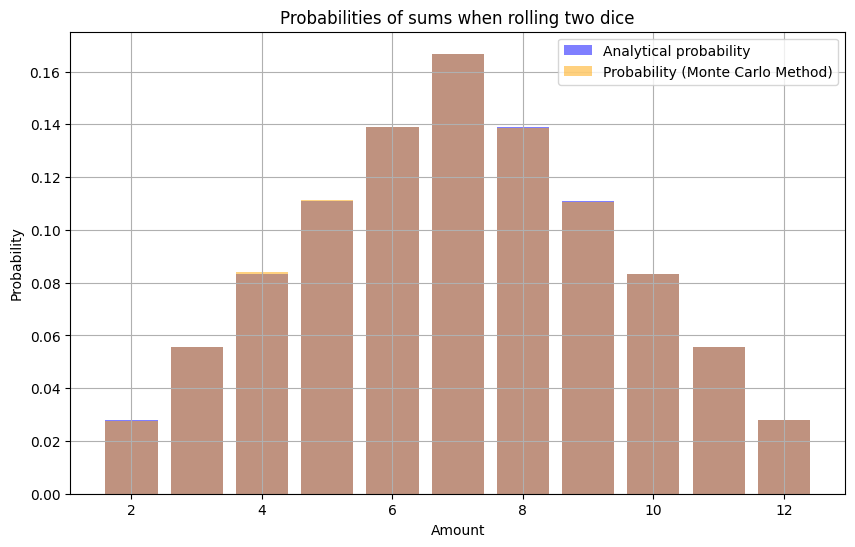

In [5]:
import random
import matplotlib.pyplot as plt

def monte_carlo_simulation(num_rolls):
    counts = {i: 0 for i in range(2, 13)}

    for _ in range(num_rolls):
        dice1 = random.randint(1, 6)
        dice2 = random.randint(1, 6)
        sum_dices = dice1 + dice2
        counts[sum_dices] += 1

    probabilities = {sum_: count / num_rolls for sum_, count in counts.items()}
    return probabilities

analytical_probabilities = {
    2: 1/36,
    3: 2/36,
    4: 3/36,
    5: 4/36,
    6: 5/36,
    7: 6/36,
    8: 5/36,
    9: 4/36,
    10: 3/36,
    11: 2/36,
    12: 1/36
}

num_rolls = 1000000

mc_probabilities = monte_carlo_simulation(num_rolls)

print("Sum Analytical Probability (Monte Carlo Method)")
for sum_ in range(2, 13):
    print(f"{sum_:4}  {analytical_probabilities[sum_]:23.4f}  {mc_probabilities[sum_]:.4f}")

# Visualisation of results
sums = list(range(2, 13))
analytical_values = [analytical_probabilities[sum_] for sum_ in sums]
mc_values = [mc_probabilities[sum_] for sum_ in sums]

plt.figure(figsize=(10, 6))
plt.bar(sums, analytical_values, alpha=0.5, label='Analytical probability', color='blue')
plt.bar(sums, mc_values, alpha=0.5, label='Probability (Monte Carlo Method)', color='orange')
plt.xlabel('Amount')
plt.ylabel('Probability')
plt.legend()
plt.title('Probabilities of sums when rolling two dice')
plt.grid(True)
plt.show()
